In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import sys
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colorbar
from matplotlib import rc
from scipy.optimize import fsolve
from scipy.integrate import simpson
from numpy import trapz
from numpy.polynomial.polynomial import polyfit
from scipy import integrate
from scipy.interpolate import CubicSpline
from scipy.interpolate import UnivariateSpline
from matplotlib.pyplot import cm
from brokenaxes import brokenaxes

plt.rcParams["font.family"] = "Times New Roman"

mpl.rcParams['axes.linewidth'] = 2

In [2]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [110]:
def kappa_lineplots_T_comp(Text_dir_kappa,Graph_dir,N,U,dtau,trot):

    T_val = np.zeros(len(trot))
    
    for k in range(len(trot)):
        T_val[k] = 1/(float(dtau)*float(trot[k]))
        
        
    
    plt.figure(figsize = (25,20))
    plt.xticks(fontsize = 80)
    plt.yticks(fontsize = 80)
    #plt.ylim(-2,2)
    
    #color_1 = iter(['red','orange','goldenrod','blue','purple']) #cm.jet(np.linspace(0, 1, int(len()/2)+1)))
    for k in range(len(trot)):
        #c_1 = next(color_1)
        filename_kappa = "%s/Text_files_N_%s_U_%s_dtau_%s/Charge_gap_data_N_%s_U_%s_dtau_%s_L_%s.dat"%(Text_dir_kappa,N,U,dtau,N,U,dtau,trot[k])
        mu_val,num_den,kap,kap_std = np.loadtxt(filename_kappa,unpack = 'True',usecols = [0,1,3,4])      
        plt.errorbar(num_den,kap,yerr=kap_std,marker = "o",markersize = 20,elinewidth=3,capsize=5,label = "T=%s"%(str(round(T_val[k],3))))
    plt.grid("True",which='both')
    plt.legend(loc='best',ncol=1,fontsize=60)
    #plt.xlim(0.75,1.25)
    plt.axhline(y = 0,color = 'black',linewidth = 2,linestyle = 'dashed')
    plt.tight_layout()
    plt.savefig("%s/TDOS_vs_density_N_%s_U_%s.png"%(Graph_dir,N,U))
    plt.close('all')


    plt.figure(figsize = (25,20))
    plt.xticks(fontsize = 80)
    plt.yticks(fontsize = 80)
    
    #color_1 = iter(['red','orange','goldenrod','blue','purple'])
    for k in range(len(trot)):
        #c_1 = next(color_1)
        filename_kappa = "%s/Text_files_N_%s_U_%s_dtau_%s/Charge_gap_data_N_%s_U_%s_dtau_%s_L_%s.dat"%(Text_dir_kappa,N,U,dtau,N,U,dtau,trot[k])
        mu_val,num_den,kap,kap_std = np.loadtxt(filename_kappa,unpack = 'True',usecols = [0,1,3,4])        
        plt.errorbar(mu_val,kap,yerr=kap_std,marker = "o",markersize = 20,elinewidth=3,capsize=5,label = "T=%s"%(str(round(T_val[k],3))))
    plt.grid("True",which='both')
    plt.legend(loc='lower right',ncol=1,fontsize=60)
    #plt.xlim(-7.5,0)
    plt.axhline(y = 0,color = 'black',linewidth = 2,linestyle = 'dashed')
    plt.tight_layout()
    plt.savefig("%s/TDOS_vs_chemical_potential_N_%s_U_%s.png"%(Graph_dir,N,U))
    plt.close('all')


    plt.figure(figsize = (25,20))
    plt.xticks(fontsize = 80)
    plt.yticks(fontsize = 80)
    
    #color_1 = iter(['red','orange','goldenrod','blue','purple'])
    for k in range(len(trot)):
        #c_1 = next(color_1)
        filename_kappa = "%s/Text_files_N_%s_U_%s_dtau_%s/dkappa_dT_data_N_%s_U_%s_dtau_%s_L_%s.dat"%(Text_dir_kappa,N,U,dtau,N,U,dtau,trot[k])
        mu_val,num_den,kap,kap_std = np.loadtxt(filename_kappa,unpack = 'True',usecols = [0,1,3,4])        
        plt.errorbar(mu_val,kap,yerr=kap_std,marker = "o",markersize = 20,elinewidth=3,capsize=5,label = "T=%s"%(str(round(T_val[k],3))))
    plt.grid("True",which='both')
    plt.legend(loc='lower right',ncol=1,fontsize=60)
    plt.xlim(0.5,1.1)
    #plt.xlim(-7.5,0)
    plt.axhline(y = 0,color = 'black',linewidth = 2,linestyle = 'dashed')
    plt.tight_layout()
    plt.savefig("%s/dkappa_dT_vs_chemical_potential_N_%s_U_%s.png"%(Graph_dir,N,U))
    plt.close('all')


    
    plt.figure(figsize = (25,20))
    plt.xticks(fontsize = 80)
    plt.yticks(fontsize = 80)
    
    #color_1 = iter(['red','orange','goldenrod','blue','purple'])
    for k in range(len(trot)):
        #c_1 = next(color_1)
        filename_kappa = "%s/Text_files_N_%s_U_%s_dtau_%s/Charge_gap_data_N_%s_U_%s_dtau_%s_L_%s.dat"%(Text_dir_kappa,N,U,dtau,N,U,dtau,trot[k])
        mu_val,num_den,num_den_std = np.loadtxt(filename_kappa,unpack = 'True',usecols = [0,1,2])       
        plt.errorbar(mu_val,num_den,yerr=num_den_std,marker = "o",markersize = 20,elinewidth=3,capsize=5,label = "T=%s"%(str(round(T_val[k],3))))
    plt.grid("True",which='both')
    #plt.legend(loc='lower center',ncol=1,fontsize=60)
    #plt.xlim(-7,0)
    plt.ylim(0,1)
    plt.axhline(y = 0,color = 'black',linewidth = 2,linestyle = 'dashed')
    plt.tight_layout()
    plt.savefig("%s/Density_vs_chemical_potential_N_%s_U_%s.png"%(Graph_dir,N,U))
    plt.close('all')


In [111]:
def kappa_lineplots_U_comp(Text_dir_kappa,Graph_dir,N,U,dtau,trot):

        
    
    plt.figure(figsize = (25,20))
    plt.xticks([0.90,0.95,1.00,1.05,1.10],fontsize = 80)
    plt.yticks(fontsize = 80)
    
    #color_1 = iter(['olive','cyan','green','purple','blue','orange','red','brown'])
    for k in range(len(U)):

        filename_kappa = "%s/Text_files_N_%s_U_%s_dtau_%s/dkappa_dT_data_N_%s_U_%s_dtau_%s_L_%s.dat"%(Text_dir_kappa,N,U[k],dtau,N,U[k],dtau,trot)
        nden,kap,kap_std = np.loadtxt(filename_kappa,unpack = 'True',usecols = [1,3,4])
        #c_1 = next(color_1)
        plt.errorbar(nden,0.5*(np.add(np.asarray(kap),np.asarray(kap[::-1]))),yerr=kap_std,marker = "o",markersize = 20,linewidth = 3,elinewidth=3,capsize=10,label = "U=%s"%U[k])

    plt.grid("True",which='both')
    plt.legend(loc='best',ncol=1,fontsize=60)
    plt.xlim(0.9,1.1)
    plt.ylim(-0.02,0.005)
    plt.axhline(y = 0,color = 'black',linewidth = 2,linestyle = 'dashed')
    plt.tight_layout()
    plt.savefig("%s/TDOS_vs_density_N_%s_dtau_%s_L_%s.png"%(Graph_dir,N,dtau,trot))
    plt.close('all')


    plt.figure(figsize = (25,20))
    plt.xticks(fontsize = 80)
    plt.yticks(fontsize = 80)
    
    #color_1 = iter(['olive','cyan','green','purple','blue','orange','red','brown'])
    for k in range(len(U)):

        filename_kappa = "%s/Text_files_N_%s_U_%s_dtau_%s/dkappa_dT_data_N_%s_U_%s_dtau_%s_L_%s.dat"%(Text_dir_kappa,N,U[k],dtau,N,U[k],dtau,trot)
        mu_val,kap,kap_std = np.loadtxt(filename_kappa,unpack = 'True',usecols = [0,3,4])
        #c_1 = next(color_1)
        plt.errorbar(mu_val,kap,yerr=kap_std,marker = "o",markersize = 20,linewidth = 3,elinewidth=3,capsize=10,label = "U=%s"%U[k])

    plt.grid("True",which='both')
    plt.legend(loc='best',ncol=1,fontsize=50)
    plt.xlim(-1.5,1.5)
    #plt.ylim(-5.2,5.2)
    plt.axhline(y = 0,color = 'black',linewidth = 2,linestyle = 'dashed')
    plt.tight_layout()
    plt.savefig("%s/TDOS_vs_chemical_potential_N_%s_dtau_%s_L_%s.png"%(Graph_dir,N,dtau,trot))
    plt.close('all')


In [112]:
def charge_gap_vs_chemical_potential_contour_plots(Text_dir,Graph_dir,N,u,dtau,trot):
    
    filename_kappa = "%s/Text_files_N_%s_U_%s_dtau_%s/dKappa_dT_data_N_%s_U_%s_dtau_%s_L_%s.dat"%(Text_dir,N,u[0],dtau,N,u[0],dtau,trot)
    nden,dkdt,dkdt_std = np.loadtxt(filename_kappa,unpack = 'True',usecols = [1,3,4])
        
    dK_dT = np.zeros(len(nden)*(len(u)))      #dkappa_dT.tolist()
    dK_dT_std = np.zeros(len(nden)*(len(u)))  #dkappa_dT_std.tolist()
    Mu_val = np.zeros(len(nden)*(len(u)))
    U_val = np.zeros(len(nden)*(len(u)))      #T.tolist()
    Nden = np.zeros(len(nden)*(len(u)))      #[float(U[0])*x for x in [1]*len(Trot)]
    n_len = len(nden)
    print("nden",nden)
    for k in range(len(u)):
        print(u[k])
        start_ind = k*n_len
        end_ind = (k+1)*n_len
        filename_kappa = "%s/Text_files_N_%s_U_%s_dtau_%s/dKappa_dT_data_N_%s_U_%s_dtau_%s_L_%s.dat"%(Text_dir,N,u[k],dtau,N,u[k],dtau,trot)
        mu_val,num_den,dkdt,dkdt_std = np.loadtxt(filename_kappa,unpack = 'True',usecols = [0,1,3,4])
        Nden[start_ind:end_ind] = np.copy(num_den)
        dK_dT[start_ind:end_ind] = np.copy(dkdt)
        dK_dT_std[start_ind:end_ind] = np.copy(dkdt_std)
        U_val[start_ind:end_ind] = float(u[k])*np.ones(len(nden))
        Mu_val[start_ind:end_ind] = np.copy(mu_val)

    Mu_grid = np.linspace(np.nanmin(Mu_val),np.nanmax(Mu_val),num = 2*len(mu_val)+1)
    U_grid = np.linspace(np.nanmin(U_val),np.nanmax(U_val),num=2*(len(u))+1)

    Mu_mesh,U_mesh = np.meshgrid(Mu_grid,U_grid,indexing = 'xy')
    grid_k_c = griddata(np.stack((Mu_val,U_val),axis=1),dK_dT,(Mu_mesh,U_mesh),method = 'cubic')
    
    cm = matplotlib.colormaps.get_cmap('seismic')

    plt.figure()
    plt.figure(figsize = (25,20))
    ax = plt.gca()
    plt.xticks(fontsize = 80)
    plt.yticks(fontsize = 80)
    im = plt.contourf(Mu_mesh,U_mesh,grid_k_c,np.arange(-0.07, 0.07, .005),extend='both',cmap = cm)
    plt.grid('True',which = 'both')
    CS_2 = ax.contour(Mu_mesh,U_mesh,grid_k_c, [0.0], colors = ['black'], linestyles = ['dashdot'],linewidths = [5])
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im, cax= cax)
    cbar.ax.tick_params(labelsize = 60)
    plt.tight_layout()
    plt.savefig("%s/dkappa_dT_vs_chemical_potential_N_%s_dtau_%s_L_%s_contour.png"%(Graph_dir,N,dtau,trot))

In [113]:
def charge_gap_vs_density_contour_plots(Text_dir,Graph_dir,N,u,dtau,trot):
    
    filename_kappa = "%s/Text_files_N_%s_U_%s_dtau_%s/dKappa_dT_data_N_%s_U_%s_dtau_%s_L_%s.dat"%(Text_dir,N,u[0],dtau,N,u[0],dtau,trot)
    nden,dkdt,dkdt_std = np.loadtxt(filename_kappa,unpack = 'True',usecols = [1,3,4])
        
    dK_dT = np.zeros(len(nden)*(len(u)))      #dkappa_dT.tolist()
    dK_dT_std = np.zeros(len(nden)*(len(u)))  #dkappa_dT_std.tolist()
    Mu_val = np.zeros(len(nden)*(len(u)))
    U_val = np.zeros(len(nden)*(len(u)))      #T.tolist()
    Nden = np.zeros(len(nden)*(len(u)))      #[float(U[0])*x for x in [1]*len(Trot)]
    n_len = len(nden)

    for k in range(len(u)):
        print(u[k])
        start_ind = k*n_len
        end_ind = (k+1)*n_len
        filename_kappa = "%s/Text_files_N_%s_U_%s_dtau_%s/dKappa_dT_data_N_%s_U_%s_dtau_%s_L_%s.dat"%(Text_dir,N,u[k],dtau,N,u[k],dtau,trot)
        mu_val,num_den,dkdt,dkdt_std = np.loadtxt(filename_kappa,unpack = 'True',usecols = [0,1,3,4])
        Nden[start_ind:end_ind] = np.copy(num_den)
        dK_dT[start_ind:end_ind] = np.copy(dkdt)
        dK_dT_std[start_ind:end_ind] = np.copy(dkdt_std)
        U_val[start_ind:end_ind] = float(u[k])*np.ones(len(nden))
        Mu_val[start_ind:end_ind] = np.copy(mu_val)

    Mu_grid = np.linspace(np.nanmin(Mu_val),np.nanmax(Mu_val),num = 2*len(mu_val)+1)
    U_grid = np.linspace(np.nanmin(U_val),np.nanmax(U_val),num=2*(len(u))+1)
    N_grid = np.linspace(1,np.nanmax(Nden),num=2*(len(nden))-1)
    
    N_mesh,U_mesh = np.meshgrid(N_grid,U_grid,indexing = 'xy')
    grid_k_c = griddata(np.stack((Nden,U_val),axis=1),dK_dT,(N_mesh,U_mesh),method = 'cubic')
    
    cm = matplotlib.colormaps.get_cmap('seismic')

    plt.figure()
    plt.figure(figsize = (25,20))
    ax = plt.gca()
    plt.xlim(1,1.2)
    plt.xticks([1.0,1.05,1.10,1.15,1.2],fontsize = 80)
    plt.yticks(fontsize = 80)
    im = plt.contourf(N_mesh,U_mesh,grid_k_c,np.arange(-0.07, 0.07, .0025),extend='both',cmap = cm)
    plt.grid('True',which = 'both')
    CS_2 = ax.contour(N_mesh,U_mesh,grid_k_c, [0.0], colors = ['black'], linestyles = ['dashdot'],linewidths = [5])
    divider = make_axes_locatable(ax)

    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im, cax= cax)
    cbar.ax.tick_params(labelsize = 60)
    plt.tight_layout()
    plt.savefig("%s/dkappa_dT_vs_density_N_%s_dtau_%s_L_%s_contour.png"%(Graph_dir,N,dtau,trot))

In [119]:
def main():
    
    N = "10"
    dtau = "0.05"
    U = ["6.00"] #,"6.00","8.00","10.00"] #,"2.0","3.0","4.00","5.0","6.00","7.0","8.00","9.0"] #,"10.00"]
    Trot = ["16","18","20","22","24","26","28","30","32","34","36","38","40"] #,"42"]
    #Beta = ["2.00","1.90","1.80","1.70","1.60","1.50","1.40","1.30","1.20","1.10","1.00","0.90","0.80","0.70","0.60","0.55","0.50","0.45","0.40","0.35","0.30"]

    
    Text_dir_kappa = "/Users/roy.369/Documents/Cold_atom_correlators/FHM_Legacy_data/FHM_Roy_data/Text_files/Text_files_N_%s_charge_gap"%N
    Graph_dir_kappa = "/Users/roy.369/Documents/Cold_atom_correlators/FHM_Legacy_data/FHM_Roy_data/Graphs/Graphs_N_%s_charge_gap"%N

    if not os.path.exists(Graph_dir_kappa):
       os.makedirs(Graph_dir_kappa)
    
    for k in range(len(U)):
        kappa_lineplots_T_comp(Text_dir_kappa,Graph_dir_kappa,N,U[k],dtau,Trot)

    #for k in range(len(Trot)):  
    #    kappa_lineplots_U_comp(Text_dir_kappa,Graph_dir_kappa,N,U,dtau,Trot[k])
        #charge_gap_vs_chemical_potential_contour_plots(Text_dir_kappa,Graph_dir_kappa,N,U,dtau,Trot[k])
        #charge_gap_vs_density_contour_plots(Text_dir_kappa,Graph_dir_kappa,N,U,dtau,Trot[k])


In [120]:
main()

In [14]:
N=10
U="6.00"
dtau="0.05"
trot = ["12","16","20","24","28","32","36","40"]
Text_dir_kappa = "/Users/roy.369/Documents/Cold_atom_correlators/FHM_Legacy_data/FHM_Roy_data/Text_files/Text_files_N_%s_charge_gap"%N
Graph_dir_kappa = "/Users/roy.369/Documents/Cold_atom_correlators/FHM_Legacy_data/FHM_Roy_data/Graphs/Graphs_N_%s_charge_gap"%N

plt.figure(figsize = (25,20))
plt.xticks(fontsize = 80)
plt.yticks(fontsize = 80)
color_1=iter(['blue','dodgerblue','darkgreen','olive','goldenrod','darkorange','peru','red'])
for k in range(len(trot)-1,-1,-1):
    c_1 = next(color_1)
    T_val = 1/(float(dtau)*float(trot[k]))
    filename_kappa = "%s/Text_files_N_%s_U_%s_dtau_%s/dkappa_dT_data_N_%s_U_%s_dtau_%s_L_%s.dat"%(Text_dir_kappa,N,U,dtau,N,U,dtau,trot[k])
    mu_val,num_den,kap,kap_std = np.loadtxt(filename_kappa,unpack = 'True',usecols = [0,1,3,4])        
    plt.errorbar(num_den,kap,yerr=kap_std,c=c_1,marker = "o",markersize = 25,linewidth=2,elinewidth=3,capsize=5,label = "T=%s"%(str(round(T_val,3))))
plt.grid("True",which='both')
plt.legend(loc='best',ncol=2,fontsize=60)
plt.xlim(1.0,1.11)
plt.axhline(y = 0,color = 'black',linewidth = 2,linestyle = 'dashed')
plt.tight_layout()
plt.savefig("%s/dkappa_dT_vs_density_N_%s_U_%s.png"%(Graph_dir_kappa,N,U))
plt.close('all')

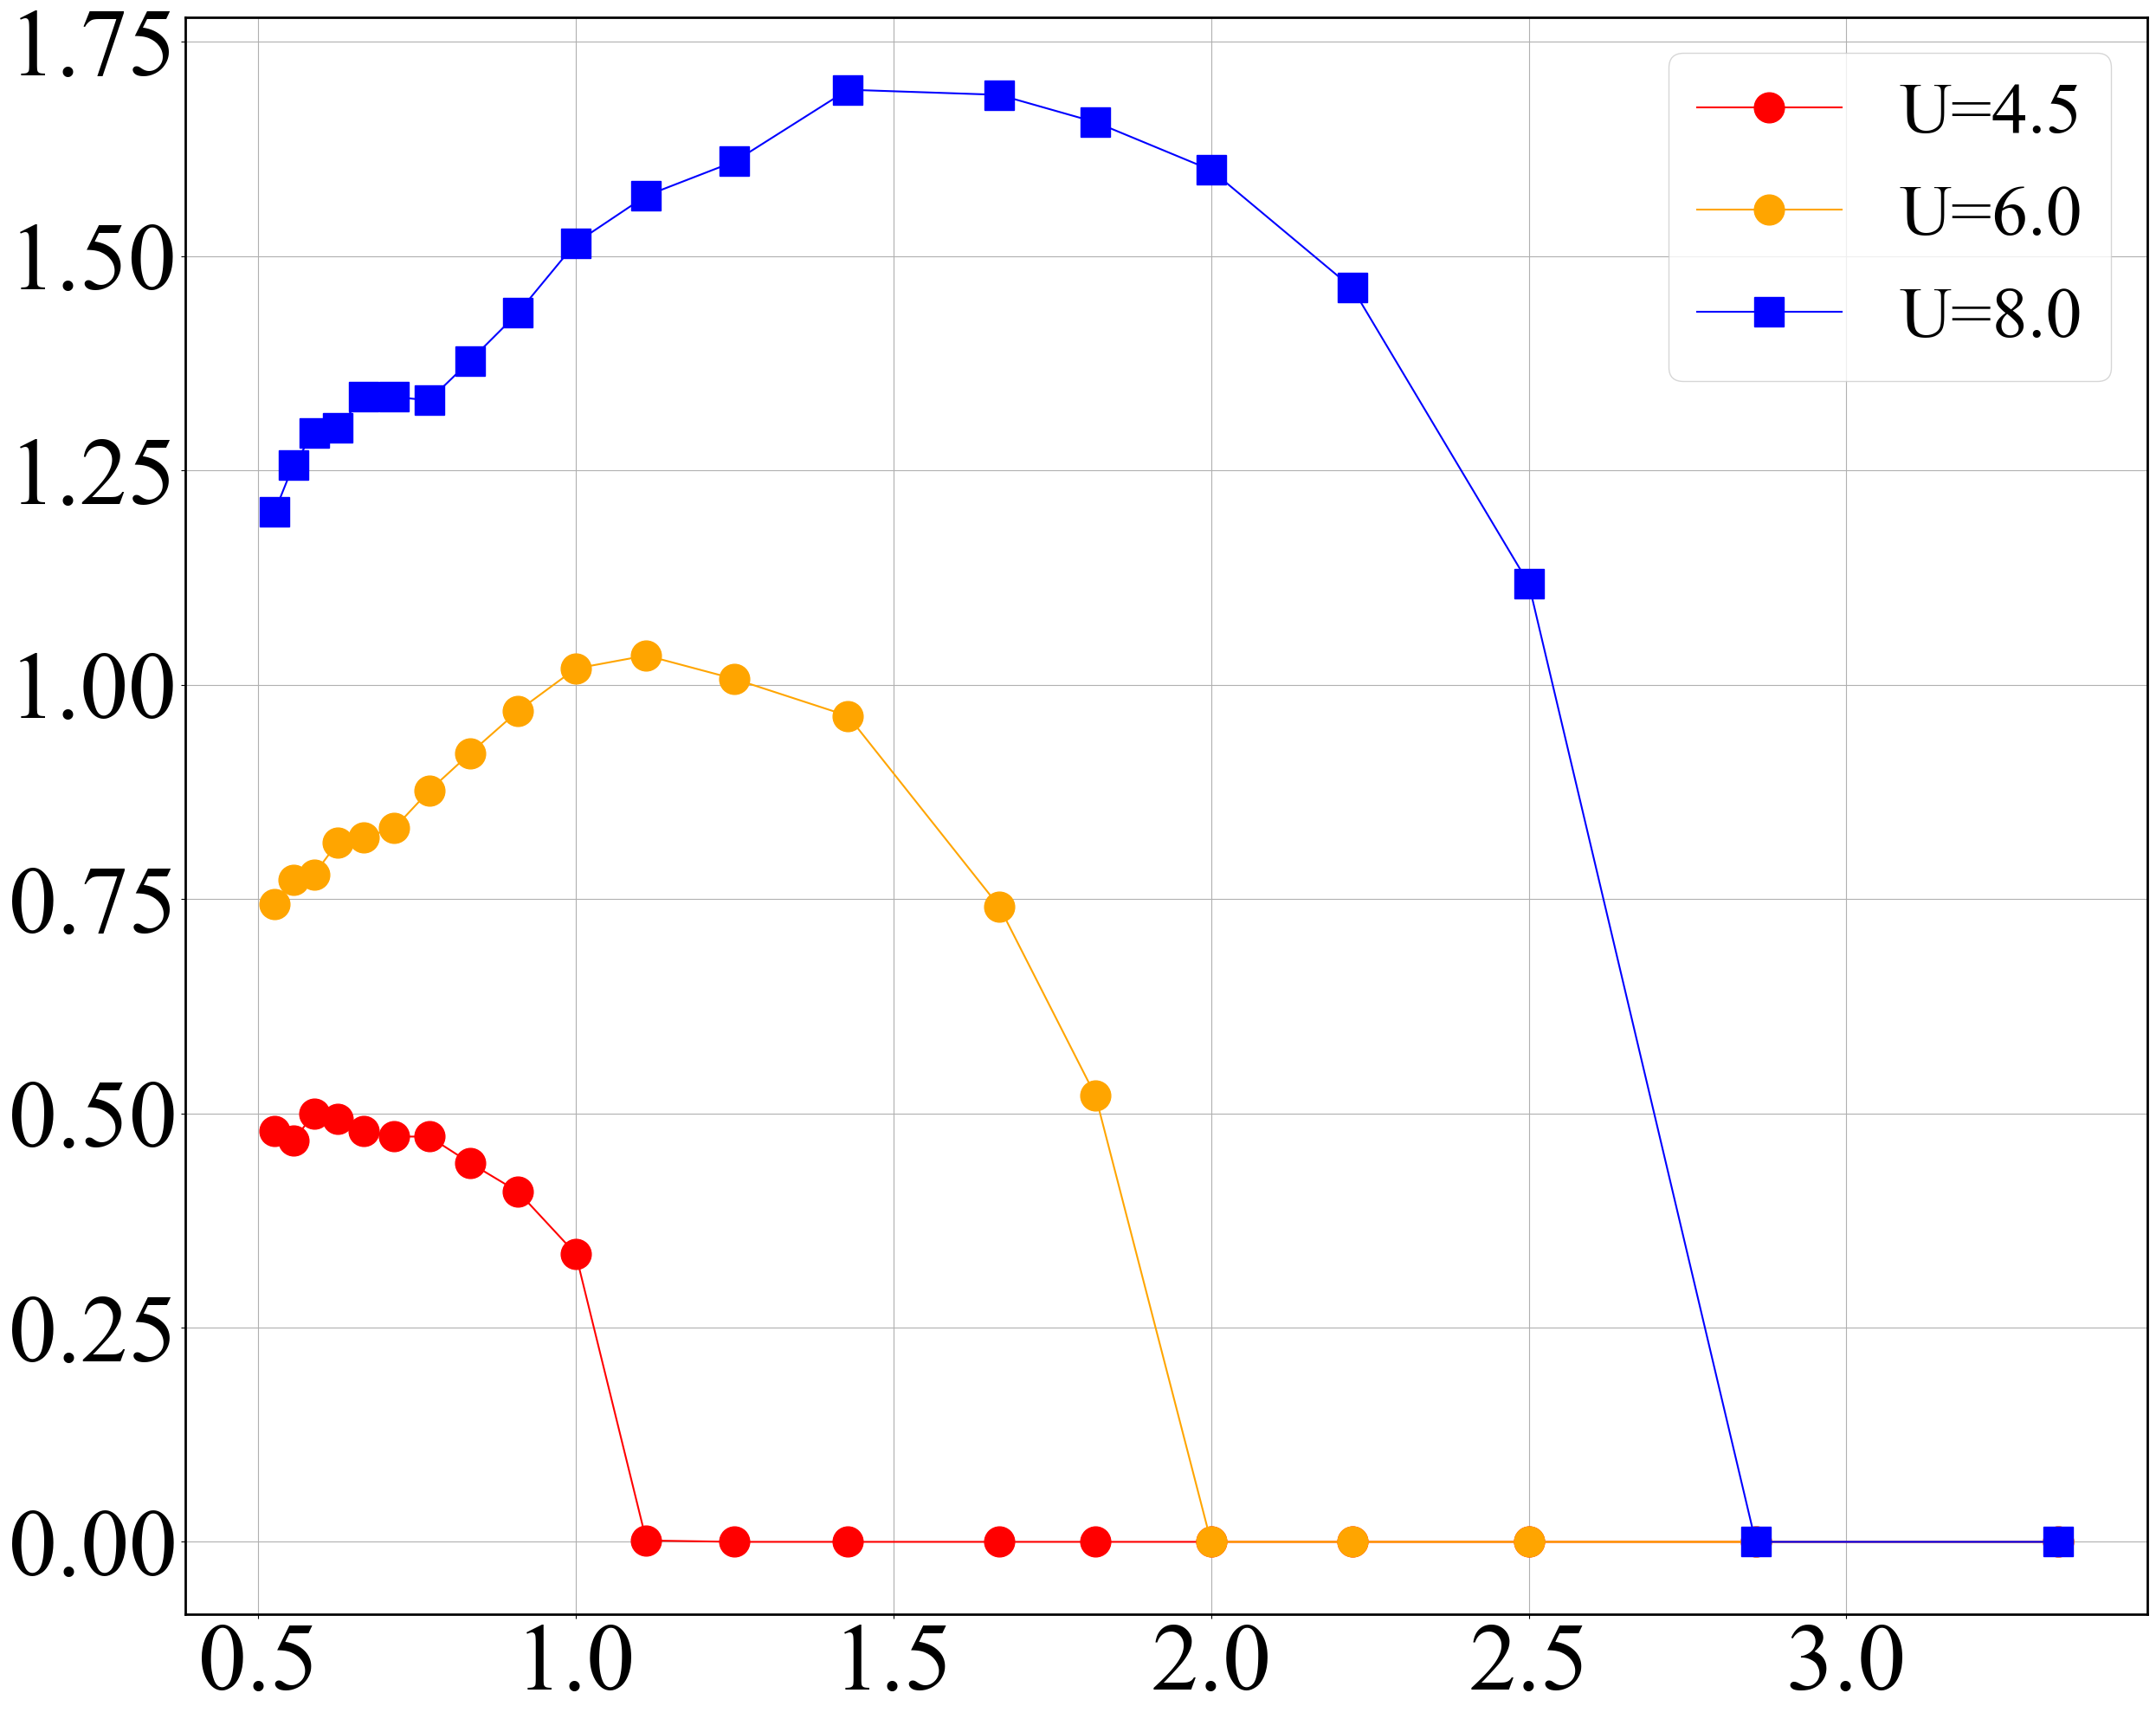

In [12]:
N="10"
beta = ["2.00","1.90","1.80","1.70","1.60","1.50","1.40","1.30","1.20","1.10","1.00","0.90","0.80","0.70","0.60","0.55","0.50","0.45","0.40","0.35","0.30"] 
T_val = []
for i in range(len(beta)):
    T_val.append(1/float(beta[i]))
        
muc_U6_low = [0.7213675213675215, 0.7435897435897436, 0.7726495726495728, 0.7786324786324788, 0.8153846153846155, 0.8222222222222223, 0.8324786324786326, 0.8760683760683762, 0.9196581196581197, 0.9692307692307693, 1.018803418803419]
muc_U8_low = [1.279591836734694, 1.2020408163265306, 1.256122448979592, 1.2938775510204081, 1.2999999999999998, 1.3357142857142856, 1.3357142857142856, 1.3316326530612244, 1.3775510204081631, 1.433673469387755, 1.5153061224489792]
muc_U10_low = [1.9928571428571429, 2.0595238095238093, 2.0428571428571427, 1.9595238095238097, 2.0357142857142856, 2.1, 1.911904761904762, 2.0238095238095237, 2.0595238095238093, 2.0880952380952382, 2.1190476190476195]
muc_U6_high = [1.0340248962655605, 1.0066390041493776, 0.9634854771784234, 0.7410788381742739, 0.5203319502074688,0.0,0.0,0.0,0.0,0.0] 
muc_U8_high = [1.5704318936877075, 1.6102990033222588, 1.694019933554817, 1.6880398671096342, 1.656146179401993, 1.600332225913621, 1.4627906976744185, 1.1179401993355482, 0.0,0.0]
muc_U10_high = [2.1593114814136607, 2.2616370628090094, 2.268613806995056, 2.3197765976927305, 2.398846365134591, 2.3453579930415676, 2.3197765976927305, 2.2174510162973817, 1.996520783739242, 1.394195202343893]
muc_U4p5_low = [0.472782874617737,0.4795107033639143, 0.4678899082568807, 0.4996941896024465, 0.4935779816513761, 0.4795107033639143,0.472782874617737, 0.472782874617737,0.44220183486238535]
muc_U4p5_high = [0.4085173501577287, 0.33596214511041,0.0015772870662457694, 0, 0,0,0,0,0,0,0,0]

muc_U4p5 = muc_U4p5_low+muc_U4p5_high
muc_U6 = muc_U6_low+muc_U6_high
muc_U8 = muc_U8_low+muc_U8_high
muc_U10 = muc_U10_low+muc_U10_high


Graph_dir_kappa = "/Users/roy.369/Documents/Cold_atom_correlators/FHM_Legacy_data/FHM_Roy_data/Graphs/Graphs_N_%s_charge_gap"%N

if not os.path.exists(Graph_dir_kappa):
       os.makedirs(Graph_dir_kappa)
        
plt.figure(figsize = (25,20))
plt.xticks(fontsize = 80)
plt.yticks(fontsize = 80)
plt.plot(T_val[1:],np.asarray(muc_U4p5[1:]),c = 'red',marker = "o",markersize= 25,label = "U=4.5")
plt.plot(T_val[1:],np.asarray(muc_U6[1:]),c = 'orange',marker = "o",markersize= 25,label = "U=6.0")
plt.plot(T_val[1:],np.asarray(muc_U8[1:]),c = 'blue',marker = "s",markersize = 25,label = "U=8.0")
#plt.plot(T_val,np.asarray(muc_U10),c= 'blue',marker = "^",markersize = 25,label = "U=10.0")
plt.legend(loc='best',fontsize = 60)
plt.grid('True',which='both')
    #plt.axhline(y=0,color = 'black',linewidth = 2)
    #plt.ylim(1,1.10)
plt.tight_layout()
plt.savefig("%s/Charge_gap_N_%s.png"%(Graph_dir_kappa,N))

In [88]:
nc_4p5_high = [0.4085173501577287, 0.33596214511041,0.0015772870662457694, 0, 0,0,0]
nc_6_high = [0.9700315457413247, 1.0173501577287067, 1.036277602523659, 1.0078864353312305,0.9637223974763409, 0.7460567823343848,0.5410094637223973]
nc_8_high = [1.4337539432176656, 1.5157728706624607, 1.5694006309148267,1.610410094637224, 1.692429022082019, 1.6861198738170349,1.6514195583596214]
nc_10_high = [1.9620253164556953, 1.9968354430379749, 2.0253164556962022, 2.129746835443038, 2.231012658227848, 2.2594936708860764, 2.310126582278481]
T_high = [0.909,1.0,1.11,1.25,1.429,1.667,2.0]          

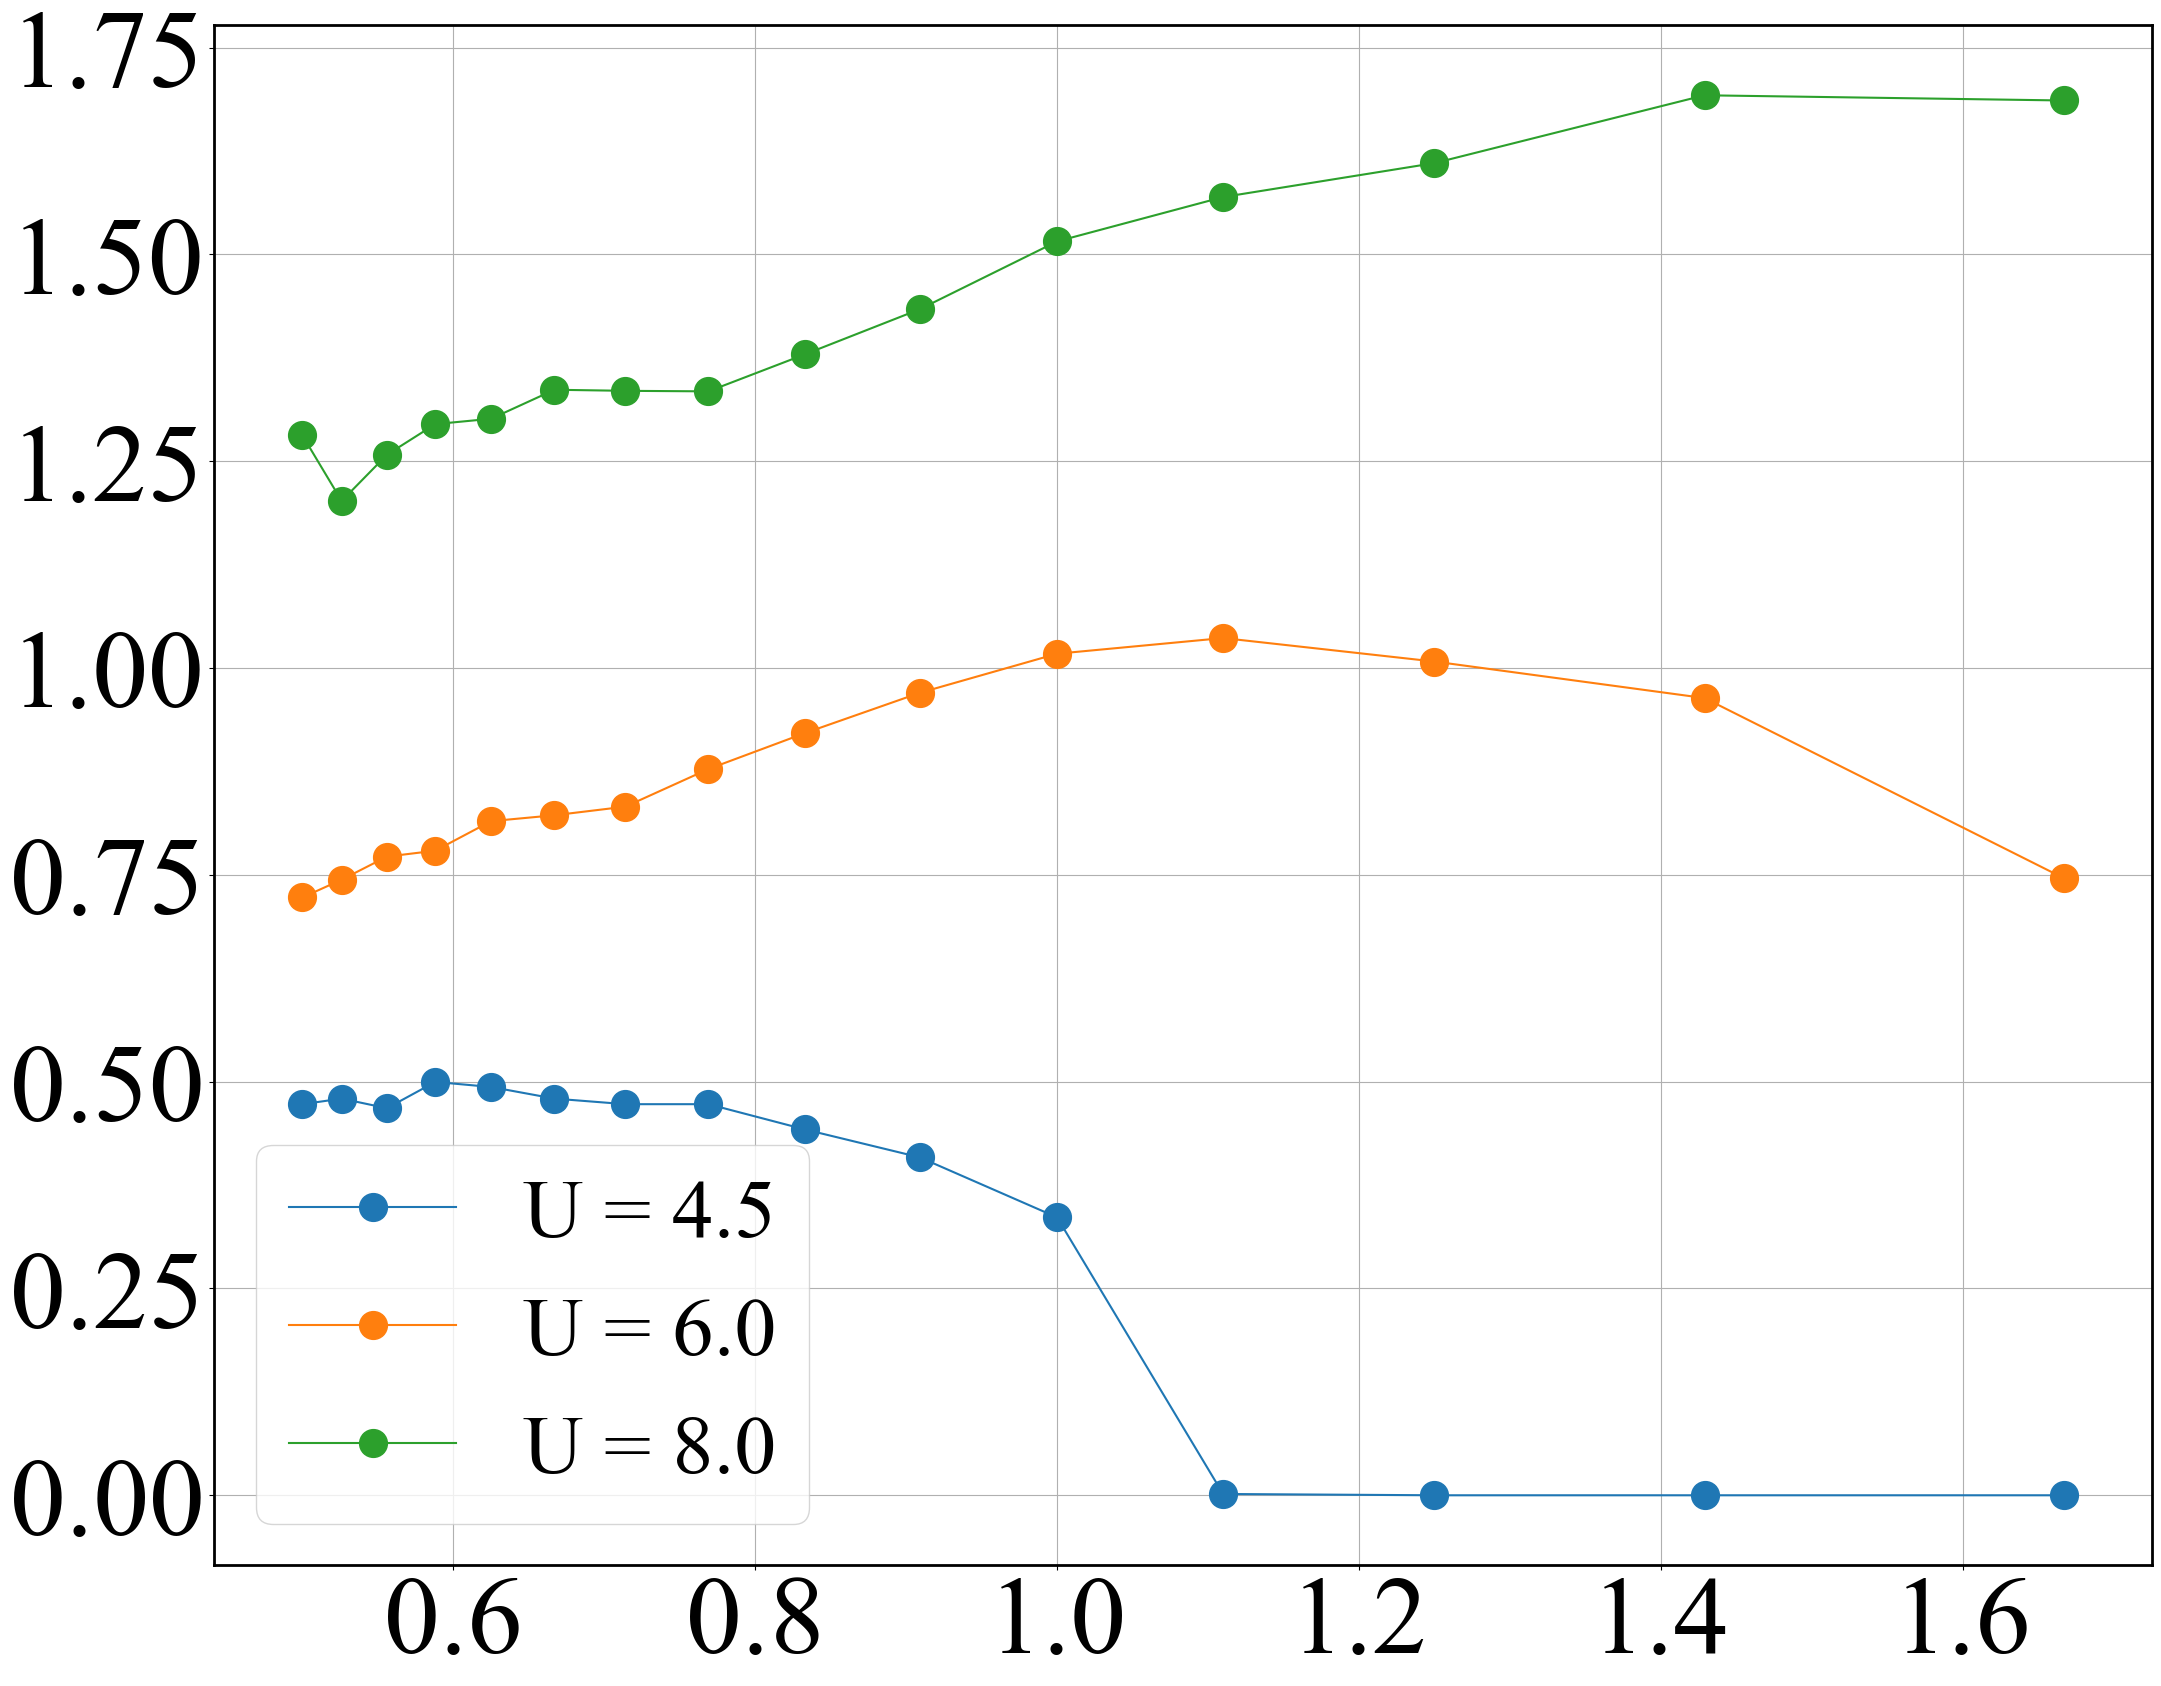

In [94]:
nc_4p5_low = [0.472782874617737,0.4795107033639143, 0.4678899082568807, 0.4996941896024465, 0.4935779816513761, 0.4795107033639143,0.472782874617737, 0.472782874617737,0.44220183486238535]
nc_6_low = [0.7227272727272727, 0.7441558441558441, 0.772077922077922, 0.7792207792207793, 0.814935064935065, 0.8220779220779221,0.8324675324675325,0.877922077922078,0.9214285714285715]
nc_8_low = [1.2812491272168691,1.20202834799609, 1.2578725038402458, 1.2948854908532328, 1.3013789973467393, 1.3364439324116744, 1.335145231112973,1.3344958804636224,1.379301075268817]
nc_10_low = [1.9549342105263157,1.8611842105263157, 1.925328947368421, 1.9249999999999998, 1.8914473684210527, 1.9055921052631577, 1.8871710526315788, 1.9167763157894735, 1.9404605263157892]
T_low = [0.5,0.526,0.556,0.588,0.625,0.667,0.714,0.769,0.833]
nc_4p5 = np.asarray(nc_4p5_low+nc_4p5_high)
nc_6 = np.asarray(nc_6_low+nc_6_high)
nc_8 = np.asarray(nc_8_low+nc_8_high)
nc_10 = np.asarray(nc_10_low+nc_10_high)
T_val = np.asarray(T_low+T_high)

plt.figure(figsize = (25,20))
plt.xticks(fontsize = 80)
plt.yticks(fontsize = 80)
plt.plot(T_val[:-1],nc_4p5[:-1],marker = "o",markersize = 20, label = "U = 4.5")
plt.plot(T_val[:-1],nc_6[:-1],marker = "o",markersize = 20, label = "U = 6.0")
plt.plot(T_val[:-1],nc_8[:-1],marker = "o",markersize = 20, label = "U = 8.0")
#plt.plot(T_val,nc_10,marker = "o",markersize = 20, label = "U = 10.0")
plt.legend(loc = 'best', fontsize = 60)
plt.grid(True, which = 'both')
